# Obesity Levels 

### Our Motivation 
The "Obesity Levels" dataset has captured our interest because obesity is a major public health issue with significant consequences. By examining this dataset, we hope to uncover the key factors contributing to obesity and leverage machine learning models to enhance our ability to classify and predict obesity levels. Understanding these factors will empower individuals and healthcare professionals to create more effective prevention strategies, ultimately reducing obesity rates and improving public health outcomes. 

### Our Goal 
Our goal is to create a machine-learning model that predicts individual obesity levels using both classification and clustering techniques. The classification approach will enable us to train the model to differentiate between individuals with different obesity levels based on a variety of health, dietary, and lifestyle factors. Clustering, on the other hand, will help identify hidden patterns in the dataset by grouping individuals with similar obesity risk profiles. These clusters will then assist in predicting obesity levels for new individuals by analyzing their resemblance to existing groups.

In [276]:
import pandas as pd
df = pd.read_csv('Dataset/ObesityDataSet_raw_and_data_sinthetic.csv')
filtered_df =pd.read_csv('Dataset/ObesityDataSet_raw_and_data_sinthetic.csv')

##### source of dataset : https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

#### General Information About The Dataset
- Dataset include 17 attributes and 2111 records.
- There is 8 attributes of type float and the other 9 of type object. 
- Class label : NObeyesdad ( type of obesity ).
- There are no missing values.

#### Clarifying Attributes' Shortcuts
- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
-  CAEC : Feature, Categorical, " Do you eat any food between meals? "
-  CH2O: Feature, Continuous, " How much water do you drink daily? "
-  SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
-  FAF: Feature, Continuous, " How often do you have physical activity? "
-  TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
-  CALC : Feature, Categorical, " How often do you drink alcohol? "
-  MTRANS : Feature, Categorical, " Which transportation do you usually use? "
-  NObeyesdad : Target, Categorical, "Obesity level"


### Data Summarization

In [284]:
import seaborn as sns 
import matplotlib.pyplot as plt


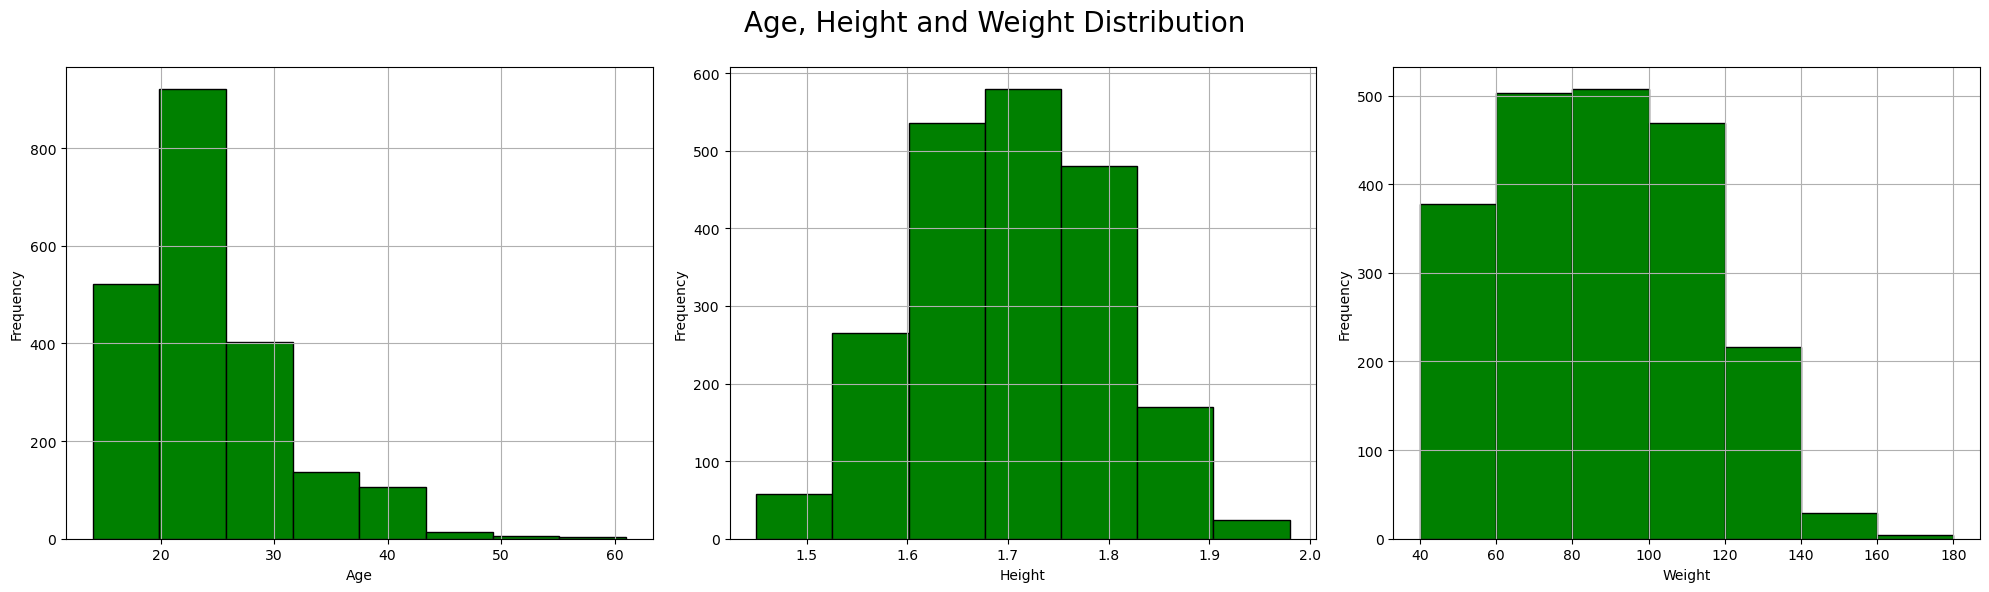

In [286]:
#subplot includes histograms of Age, Height and Weight
plt.figure(figsize=(20,6))
plt.suptitle('Age, Height and Weight Distribution', fontsize=20)

#first chart
plt.subplot(1,3,1)
df["Age"].hist(color='green' ,bins=8 ,edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")

#second chart
plt.subplot(1,3,2)
df["Height"].hist(color='green' ,bins=7,edgecolor='black')
plt.xlabel("Height")
plt.ylabel("Frequency")

#third chart
plt.subplot(1,3,3)
Weight_bins=[40, 60,80,100,120,140,160,180]
df["Weight"].hist(color='green' , bins=Weight_bins,edgecolor='black')
plt.xticks(Weight_bins)
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

### Summery of Graphs
Histograms are a powerful tool for visualizing the distribution of continuous numerical data. With the most important continuous variables in our dataset, Age, Height, and Weight.

##### 1. Age Histogram (Leftmost Plot):
- <b>Shape:</b>  The distribution is right-skewed (positively skewed).
- <b>Peak:</b> The highest frequency of individuals falls within the 20 to 25 age range.
- <b>Spread:</b> This shows that the population is largely concentrated among younger individuals, especially in their 20s and 30s.

##### 2. Height Histogram (Middle Plot):
- <b>Shape:</b> The distribution appears close to normal (bell-shaped).
- <b>Peak:</b> The most frequent height is around 1.7 meters.
- <b>Spread:</b> The heights generally range between 1.60 meters and 1.82 meters, with less individuals below or above this range.
- <b>Observation:</b> The height distribution is centered around an average height, with a symmetrical spread on both sides, indicating a typical height distribution for a population.

##### 3. Weight Histogram (Rightmost Plot):
- <b>Shape:</b> The weight distribution is slightly skewed to the right.
- <b>Peak:</b> The most frequent weights are between 60 and 120 kg.
- <b>Spread:</b> The majority of individuals weigh between 40 and 140 kg, with a significant drop in frequency for weights above 140 kg.

Text(0.5, 1.0, 'Correlation heatmap')

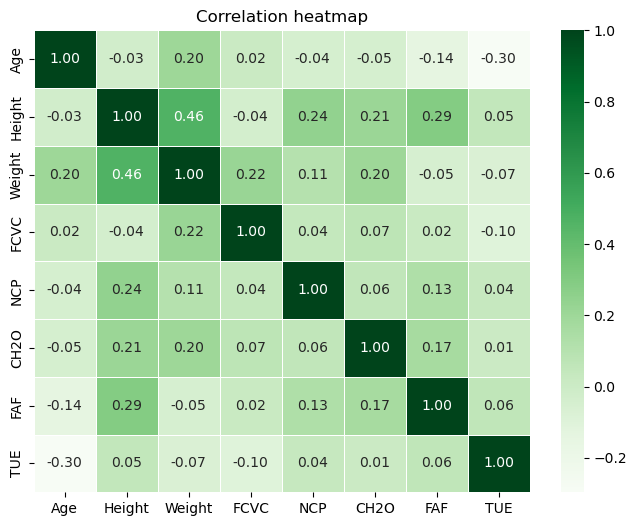

In [288]:
selected_columns = df [['Age' , 'Height' , 'Weight' , 'FCVC' , 'NCP' , 'CH2O' , 'FAF' , 'TUE']]
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True , cmap='Greens',fmt=".2f",linewidths=.5)
plt.title('Correlation heatmap')

The heatmap provides a quick visual summary of relationships, helping us identify highly correlated variables, either positively or negatively .
#### Correlation meanings :
- if the number is close to 1 , that means it has a Positive Strong Correlation
- if the number is between 0.3 and 0.7 , that means it has Moderate Correlation
- if the number is close to zero , that means it has Weak or No Correlation
- if the number is close to -1 , that means it has a Negative Strong Correlation

Most of our attributes has no correlation since they are mostly close to zero , and few has a Moderate Correlation such as ( weight and height ) there is a noticeable but not exceptionally strong linear relationship between a person's height and their weight .

### Missing Values

In [293]:
missing_values=df.isna().sum()
print('\033[1mMissing Values in each column:\033[0m')  
print(missing_values,'\n')
print('\033[1mTotal Number of Missing Values in Dataset:\033[0m')
print(missing_values.sum())
   

Missing Values in each column:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64 

Total Number of Missing Values in Dataset:
0


In [294]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<function matplotlib.pyplot.show(close=None, block=None)>

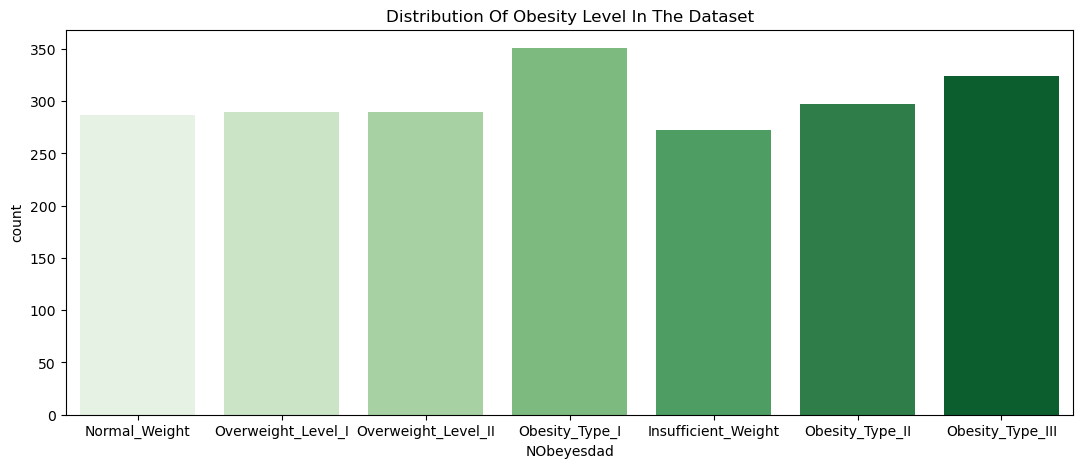

In [296]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

### Bar Chart:

We choose a bar chart because it is ideal for displaying this type of information because it visually represents the categorical distribution of data, allowing us to easily compare the frequency of each obesity level. It clearly shows differences in count across categories, making it simple to identify patterns, such as which obesity levels are most or least common, as well as categories with similar representation. The bar chart's straightforward layout makes it an effective tool for presenting discrete, non-continuous data like obesity levels, where each category is distinct and counts are important for analysis.

The dataset shows a diverse distribution across obesity categories, with the largest group in the (Obesity_Type_I) category.A substantial number of individuals also fall under Normal_Weight, Overweight_Level_I, and Overweight Level_II.

(Insufficient_Weight )is the least represented category, indicating fewer individuals fall under this category. This information can help in understanding the weight distribution and in further analysis related to health outcomes or associated risk factors.

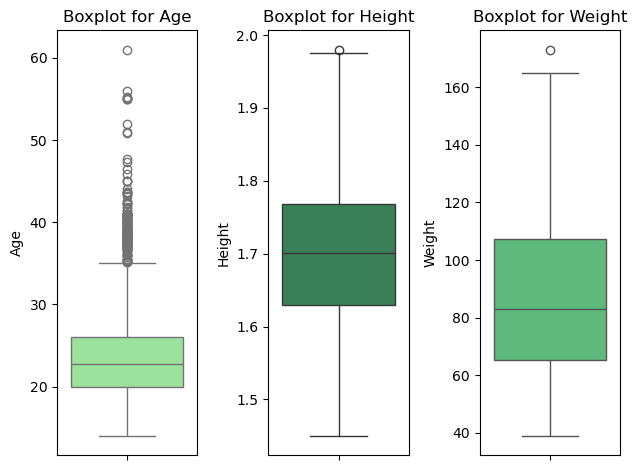

In [300]:
fig, axes = plt.subplots(1,3,)
sns.boxplot(data=df,y='Age' , ax=axes[0],color='#90EE90')
axes[0].set_title("Boxplot for Age")
sns.boxplot(data=df,y='Height' , ax=axes[1],color='#2E8B57')
axes[1].set_title("Boxplot for Height")
sns.boxplot(data=df,y='Weight' , ax=axes[2],color='#50C878')
axes[2].set_title("Boxplot for Weight")
plt.tight_layout()
plt.show();


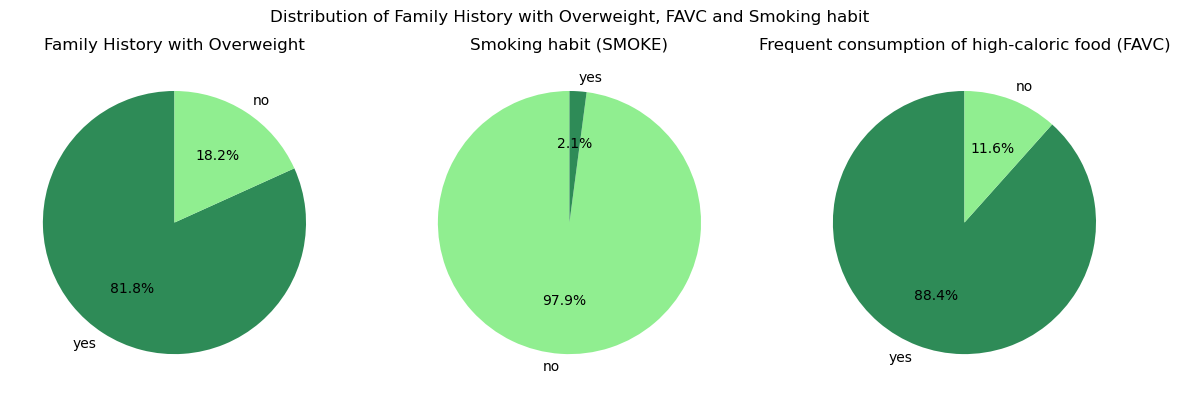

In [301]:
plt.figure(figsize=(12, 4))
plt.suptitle('Distribution of Family History with Overweight, FAVC and Smoking habit')

plt.subplot(1,3,1)
family_history_values = df['family_history_with_overweight'].value_counts()
plt.pie(family_history_values, labels=family_history_values.index, autopct='%1.1f%%', startangle=90, colors=['#2E8B57','#90EE90'])
plt.title('Family History with Overweight')

plt.subplot(1,3,2)
smoke_values = df['SMOKE'].value_counts()
plt.pie(smoke_values, labels=smoke_values.index, autopct='%1.1f%%', startangle=90, colors=['#90EE90','#2E8B57'])
plt.title('Smoking habit (SMOKE)')

plt.subplot(1,3,3)
favc_values = df['FAVC'].value_counts()
plt.pie(favc_values, labels=favc_values.index, autopct='%1.1f%%', startangle=90, colors=['#2E8B57','#90EE90'])
plt.title('Frequent consumption of high-caloric food (FAVC)')

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

### FAVC (Frequent Consumption of High-Caloric Food)
This pie chart displays the percentage of individuals who frequently consume high-caloric foo . Based on the chart, 88.4% of respondents answered “yes,” highlighting a notable presence of unhealthy eating habits, which is a significant factor in obesity. Meanwhile, the remaining 11.6% who answered “no” demonstrate healthier dietary habits among this group of individuals.

### SMOKE (Smoking habit)
This pie chart displays the percentage of individuals who smoke or not. 97.9% of the responses were ‘no,’ while only 2.1% answered ‘yes.’ This indicates that most individuals in the dataset don’t smoke, which suggests they face fewer health risks related to smoking, such as obesity. Since the majority of people here don’t smoke, it likely means that smoking isn’t a major contributing factor to obesity in this group.

### Family History With Overweight
This pie chart displays percentage of individuals with family history with overweight. 81.8% of individuals answered ‘yes,’ indicating that genetic or familial factors, such as family history, are associated with an increased risk of being overweight or obese due to both genetic and shared lifestyle factors.

### Data Preprocessing

In [305]:
label_mapping = {
    'Insufficient_Weight': 'Insufficient_Weight',
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obese',
    'Obesity_Type_II': 'Obese',
    'Obesity_Type_III': 'Obese'
}

filtered_df['NObeyesdad'] = filtered_df['NObeyesdad'].map(label_mapping)

<function matplotlib.pyplot.show(close=None, block=None)>

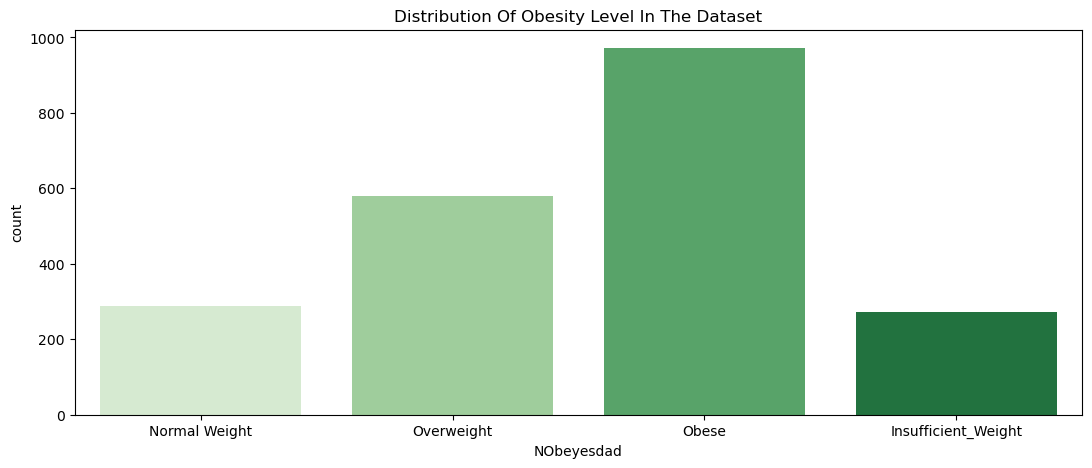

In [307]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = filtered_df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

In [308]:
from sklearn.utils import resample
print("Original distribution:")
print(filtered_df['NObeyesdad'].value_counts())

# Define downsampling proportion for majority classes
# Here, we'll downsample 'A' and 'B' to reduce the gap, but not as low as the smallest class.
downsample_ratio = 0.55# 50% of the original size for A and B

# Create a DataFrame to store the balanced data
balanced_df = pd.DataFrame()

# Apply undersampling for A and B and keep C and D unchanged
for label in filtered_df['NObeyesdad'].unique():
    df_label = filtered_df[filtered_df['NObeyesdad'] == label]
    
    if label in ['Obese', 'Overweight']:
        # Downsample 'A' and 'B' to 50% of their original size
        target_samples = int(len(df_label) * downsample_ratio)
        df_label_resampled = resample(df_label, replace=False, n_samples=target_samples, random_state=30)
    else:
        # Keep 'C' and 'D' unchanged
        df_label_resampled = df_label
    
    # Append the resampled or unchanged data to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, df_label_resampled])

# Shuffle the resulting balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print("\nBalanced distribution:")
print(balanced_df['NObeyesdad'].value_counts())

Original distribution:
NObeyesdad
Obese                  972
Overweight             580
Normal Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Balanced distribution:
NObeyesdad
Obese                  534
Overweight             319
Normal Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

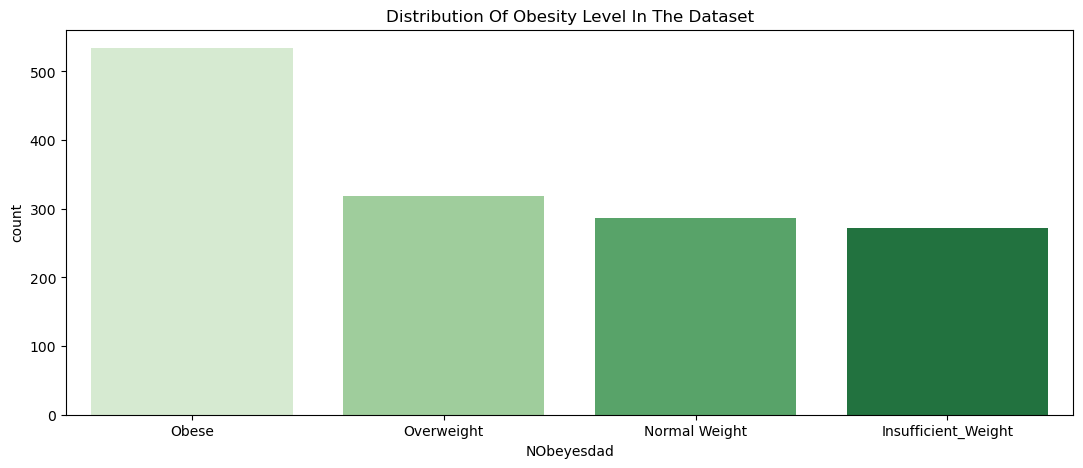

In [310]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = balanced_df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

In [313]:
print(balanced_df['NObeyesdad'].value_counts())
class_proportions = balanced_df['NObeyesdad'].value_counts(normalize=True)
print(class_proportions)

NObeyesdad
Obese                  534
Overweight             319
Normal Weight          287
Insufficient_Weight    272
Name: count, dtype: int64
NObeyesdad
Obese                  0.378187
Overweight             0.225921
Normal Weight          0.203258
Insufficient_Weight    0.192635
Name: proportion, dtype: float64


In [315]:
balanced_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,23.737505,1.698328,80.842442,2.418395,2.705337,1.969017,1.070587,0.690937
std,6.328759,0.095294,26.644441,0.540385,0.802482,0.614163,0.864179,0.627627
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.178984,1.624327,58.660809,2.000000,2.694769,1.521873,0.173476,0.000000
50%,22.000000,1.700000,78.028298,2.407817,3.000000,2.000000,1.000000,0.700792
75%,25.995853,1.767126,102.835681,3.000000,3.000000,2.364670,1.879780,1.000000
max,61.000000,1.975663,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [316]:
AgeQ1 = df['Age'].quantile(0.25)
AgeQ3 = df['Age'].quantile(0.75)

AIQR = AgeQ3 - AgeQ1

Alower_bound = AgeQ1 - 1.5 * AIQR
Aupper_bound = AgeQ3 + 1.5 * AIQR # For Age 

WQ1 = df['Weight'].quantile(0.25)
WQ3 = df['Weight'].quantile(0.75)

WIQR = WQ3 - WQ1

Wlower_bound = WQ1 - 1.5 * WIQR
Wupper_bound = WQ3 + 1.5 * WIQR # For Weight 

HQ1 = df['Height'].quantile(0.25)
HQ3 = df['Height'].quantile(0.75)

HIQR = HQ3 - HQ1

Hlower_bound = HQ1 - 1.5 * HIQR
Hupper_bound = HQ3 + 1.5 * HIQR # For Age 

balanced_filtered_df = balanced_df[(balanced_df['Age'] >= Alower_bound) & (balanced_df['Age'] <= Aupper_bound) & (balanced_df['Weight'] >= Wlower_bound) & (balanced_df['Weight'] <= Wupper_bound) &(balanced_df['Height'] >= Hlower_bound) & (balanced_df['Height'] <= Hupper_bound)  ] #This a updated Dataset
outliers = balanced_df[(balanced_df['Age'] < Alower_bound) | (balanced_df['Age'] > Aupper_bound) | (balanced_df['Weight'] < Wlower_bound) | (balanced_df['Weight'] > Wupper_bound) | (balanced_df['Height'] < Hlower_bound) | (balanced_df['Height'] > Hupper_bound) ]
balanced_filtered_df=balanced_filtered_df.reset_index(drop = True)

print("Outliers:")
print(outliers)



Outliers:
            Age  Gender    Height      Weight       CALC FAVC      FCVC  \
27    40.951591  Female  1.542122   80.000000  Sometimes  yes  2.000000   
58    40.174191    Male  1.763029  116.974504  Sometimes  yes  2.046651   
72    38.939448  Female  1.738321   86.934846  Sometimes  yes  2.843709   
73    39.135634  Female  1.507867   79.589580  Sometimes  yes  2.000000   
74    40.000000  Female  1.550000   62.000000  Sometimes   no  3.000000   
...         ...     ...       ...         ...        ...  ...       ...   
1347  37.872971  Female  1.565366   80.000000  Sometimes  yes  2.002564   
1369  39.000000  Female  1.650000   50.000000  Sometimes  yes  3.000000   
1370  40.000000  Female  1.560000   80.000000         no  yes  2.000000   
1374  37.613378  Female  1.516007   77.033049  Sometimes  yes  2.000000   
1395  37.532066  Female  1.615385   80.000000  Sometimes  yes  2.972426   

           NCP SCC SMOKE      CH2O family_history_with_overweight       FAF  \
27    1.10

### Encoding Categorical Data
##### we have use the following:

##### Label Encoder:
Use for attributes with:

- Two unique object values (binary categories, e.g. gender).
- Ordinal values with a meaningful order (e.g., ratings like "No", "Sometimes", "Frequently").

##### OneHot Encoder:
Use for attributes with:

- More than two unique object values.
- Nominal values that do not have a significant order (e.g., Categorical transportation).

##### Map Encoder:
Use for:
- Uniformly ranking categories: Allows for consistent encoding across different attributes with similar categories.



In [324]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

# OneHotEncoder for 'MTRANS' column
encoded_MTRANS = one_hot_encoder.fit_transform(balanced_filtered_df[['MTRANS']])
encoded_df = pd.DataFrame(encoded_MTRANS, columns=one_hot_encoder.get_feature_names_out(['MTRANS']), index=balanced_filtered_df.index)

 # Re-encoding CAEC and CALC uniformly
# encoding CAEC and CALC uniformly
encoding_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2}

balanced_filtered_df.loc[:,'CAEC'] = balanced_filtered_df['CAEC'].map(encoding_mapping)
balanced_filtered_df.loc[:,'CALC'] = balanced_filtered_df['CALC'].map(encoding_mapping)

# encodeing class label 
encoding_classLabel = {'Insufficient Weight,': 0, 'Normal Weight': 1,'Overweight': 2, 'Obese': 3}
balanced_filtered_df.loc[:,'NObeyesdad'] = filtered_df['NObeyesdad'].map(encoding_classLabel)

# Label encoding for other categorical columns
label_encoder = LabelEncoder()
balanced_filtered_df.loc[:,'Gender'] = label_encoder.fit_transform(balanced_filtered_df['Gender'])
balanced_filtered_df.loc[:,'SMOKE'] = label_encoder.fit_transform(balanced_filtered_df['SMOKE'])
balanced_filtered_df.loc[:,'family_history_with_overweight'] = label_encoder.fit_transform(balanced_filtered_df['family_history_with_overweight'])
balanced_filtered_df.loc[:,'FAVC'] = label_encoder.fit_transform(balanced_filtered_df['FAVC'])
balanced_filtered_df.loc[:,'SCC'] = label_encoder.fit_transform(balanced_filtered_df['SCC'])


# Concatenating the encoded columns
classLabel = balanced_filtered_df['NObeyesdad']
balanced_filtered_df = balanced_filtered_df.drop(['MTRANS','NObeyesdad'], axis=1)
balanced_filtered_df = pd.concat([balanced_filtered_df, encoded_df,classLabel], axis=1)
balanced_filtered_df


KeyError: "None of [Index(['MTRANS'], dtype='object')] are in the [columns]"

In [259]:
balanced_filtered_df = balanced_filtered_df.dropna()
print (balanced_filtered_df)

            Age Gender    Height      Weight CALC FAVC      FCVC       NCP  \
0     32.290160      1  1.754956  120.098812  1.0    1  2.967300  3.000000   
1     19.000000      1  1.750000  100.000000  0.0    1  2.000000  3.000000   
2     18.000000      0  1.456346   55.523481  1.0    1  2.000000  3.000000   
3     20.000000      1  1.600000   50.000000  1.0    0  2.000000  3.000000   
4     33.000000      0  1.560000   48.000000  1.0    0  2.000000  3.000000   
...         ...    ...       ...         ...  ...  ...       ...       ...   
1204  21.000000      0  1.500000   65.000000  1.0    0  2.000000  3.000000   
1205  22.362877      0  1.607182   82.368441  0.0    1  1.880534  2.806566   
1206  26.000000      0  1.613574  107.012256  1.0    1  3.000000  3.000000   
1207  20.796266      0  1.796538  152.473675  1.0    1  3.000000  3.000000   
1208  24.000000      0  1.600000   51.000000  1.0    1  1.000000  3.000000   

     SCC SMOKE  ...  family_history_with_overweight       FAF  

In [262]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = filtered_df.drop('NObeyesdad', axis=1)
y = filtered_df['NObeyesdad']

# Split data into training and testing sets
X_train , X_test , y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso for regression (can also use LogisticRegression with L1 for classification)
lasso = Lasso(alpha=0.01)  # Adjust alpha to control regularization strength
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
lasso_coef = lasso.coef_

# Identify selected features (non-zero coefficients)
selected_features = np.where(lasso_coef != 0)[0]
print("Selected Features:", selected_features)

ValueError: could not convert string to float: 'Female'

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
balanced_filtered_df.describe()

In [ ]:
balanced_filtered_df['Age']

In [267]:
bins = [10, 15, 20, 25, 30, 36]
labels = ['10-15' , '16-20', '21-25' , '26-30','31+']
balanced_filtered_df['Age'] = pd.cut(balanced_filtered_df['Age'],bins=bins,labels=labels,right=False)
balanced_filtered_df

C:\Users\Remas\AppData\Local\Temp\ipykernel_8688\3314724542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_filtered_df['Age'] = pd.cut(balanced_filtered_df['Age'],bins=bins,labels=labels,right=False)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,31+,1,1.754956,120.098812,1.0,1,2.967300,3.000000,0,0,...,1,0.955317,1.339232,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,16-20,1,1.750000,100.000000,0.0,1,2.000000,3.000000,0,0,...,1,2.000000,0.000000,2.0,0.0,0.0,0.0,1.0,0.0,1.0
2,16-20,0,1.456346,55.523481,1.0,1,2.000000,3.000000,1,0,...,0,0.497373,1.783319,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,21-25,1,1.600000,50.000000,1.0,0,2.000000,3.000000,0,0,...,0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,31+,0,1.560000,48.000000,1.0,0,2.000000,3.000000,0,0,...,1,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,21-25,0,1.500000,65.000000,1.0,0,2.000000,3.000000,0,0,...,1,2.000000,2.000000,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1205,21-25,0,1.607182,82.368441,0.0,1,1.880534,2.806566,0,0,...,1,2.146778,0.196084,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1206,26-30,0,1.613574,107.012256,1.0,1,3.000000,3.000000,0,0,...,1,0.000000,0.508848,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1207,21-25,0,1.796538,152.473675,1.0,1,3.000000,3.000000,0,0,...,1,0.886602,0.843283,1.0,0.0,0.0,0.0,1.0,0.0,2.0



# Min-Max normalization

In [270]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Height', 'Weight']
data_to_normalize = balanced_filtered_df[columns_to_normalize]

minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

balanced_filtered_df[columns_to_normalize] = normalized_data_minmax

print("Min-Max scaled data (only second and third columns):")
print(balanced_filtered_df)

Min-Max scaled data (only second and third columns):
        Age Gender    Height    Weight CALC FAVC      FCVC       NCP SCC  \
0       31+      1  0.613093  0.714693  1.0    1  2.967300  3.000000   0   
1     16-20      1  0.603129  0.537570  0.0    1  2.000000  3.000000   0   
2     16-20      0  0.012758  0.145615  1.0    1  2.000000  3.000000   1   
3     21-25      1  0.301565  0.096939  1.0    0  2.000000  3.000000   0   
4       31+      0  0.221147  0.079314  1.0    0  2.000000  3.000000   0   
...     ...    ...       ...       ...  ...  ...       ...       ...  ..   
1204  21-25      0  0.100522  0.229128  1.0    0  2.000000  3.000000   0   
1205  21-25      0  0.316003  0.382189  0.0    1  1.880534  2.806566   0   
1206  26-30      0  0.328854  0.599366  1.0    1  3.000000  3.000000   0   
1207  21-25      0  0.696690  1.000000  1.0    1  3.000000  3.000000   0   
1208  21-25      0  0.301565  0.105751  1.0    1  1.000000  3.000000   0   

     SMOKE  ...  family_history_wi

C:\Users\Remas\AppData\Local\Temp\ipykernel_8688\1897230956.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_filtered_df[columns_to_normalize] = normalized_data_minmax


 #### Min-Max normalization for height and weight

We employed the Min-Max normalization method to ensure that the numerical features of height and weight are scaled to a consistent range. This technique transforms the values of each feature to fall within a specific range, typically between 0 and 1. By doing this, we ensure that neither height nor weight is given undue importance due to their original larger values.